In [1]:
import pymc3
from pymc3 import Model, Normal, HalfNormal

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Intialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.linspace(0, 1, size)
X2 = np.linspace(0,.2, size)

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


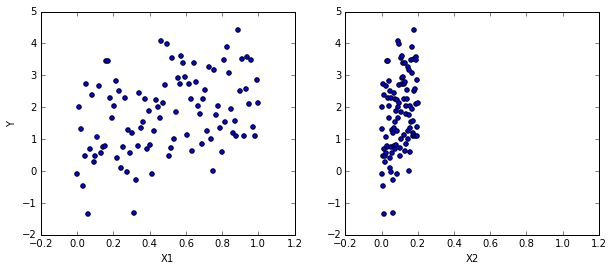

In [3]:
%pylab inline

fig, axes = subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

In [4]:
basic_model = Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = Normal('alpha', mu=0, sd=10)
    beta = Normal('beta', mu=0, sd=10, shape=2)
    sigma = HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

Applied log-transform to sigma and added transformed sigma_log to model.


In [5]:
from pymc3 import find_MAP

map_estimate = find_MAP(model=basic_model)

print(map_estimate)


{'sigma_log': array(0.11928764983495609), 'alpha': array(1.01366409951285), 'beta': array([ 1.46791595,  0.29358319])}


In [6]:
from scipy import optimize

map_estimate = find_MAP(model=basic_model, fmin=optimize.fmin_powell)

print(map_estimate)

{'sigma_log': array(0.1181510683418693), 'alpha': array(1.0175522115056725), 'beta': array([ 1.51426781,  0.03520891])}


In [7]:
from pymc3 import NUTS, sample

with basic_model:

    # obtain starting values via MAP
    start = find_MAP(fmin=optimize.fmin_powell)

    # draw 2000 posterior samples
    trace = sample(10000, start=start, njobs = 4)

Assigned NUTS to alpha
Assigned NUTS to beta
Assigned NUTS to sigma_log
 [-----------------100%-----------------] 10000 of 10000 complete in 32.7 sec

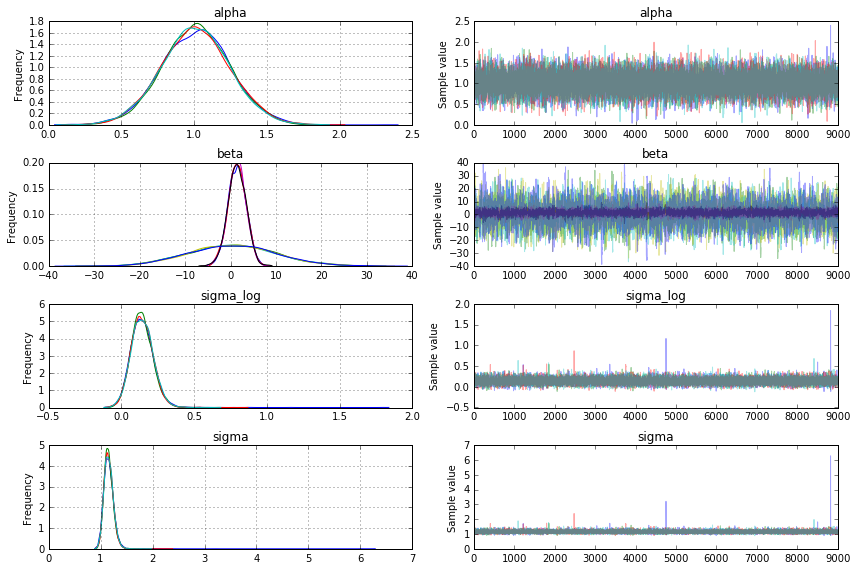

In [8]:
from pymc3 import traceplot

traceplot(trace[1000:]);


In [9]:
from pymc3 import summary

summary(trace[1000:])


alpha:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.013            0.237            0.002            [0.549, 1.480]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.549          0.856          1.014          1.170          1.480


beta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.449            2.005            0.030            [-2.422, 5.444]
  0.393            9.839            0.145            [-19.002, 19.574]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -2.577         0.122          1.461          2.805          5.304
  -18.460        -6.220         0.37